In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r'C:\JupyterNotebook\DataSet\Financial Distress Prediction.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df.shape

(150000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
# Independent variables
X = df.drop(['SeriousDlqin2yrs','Unnamed: 0'],axis = 1)

# Dependent variable
y = df['SeriousDlqin2yrs']

In [7]:
# Check the value counts
count = y.value_counts()

In [8]:
# Split the data set into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 6)

In [9]:
# save list of all the columns of X in cols
cols = list(X.columns)

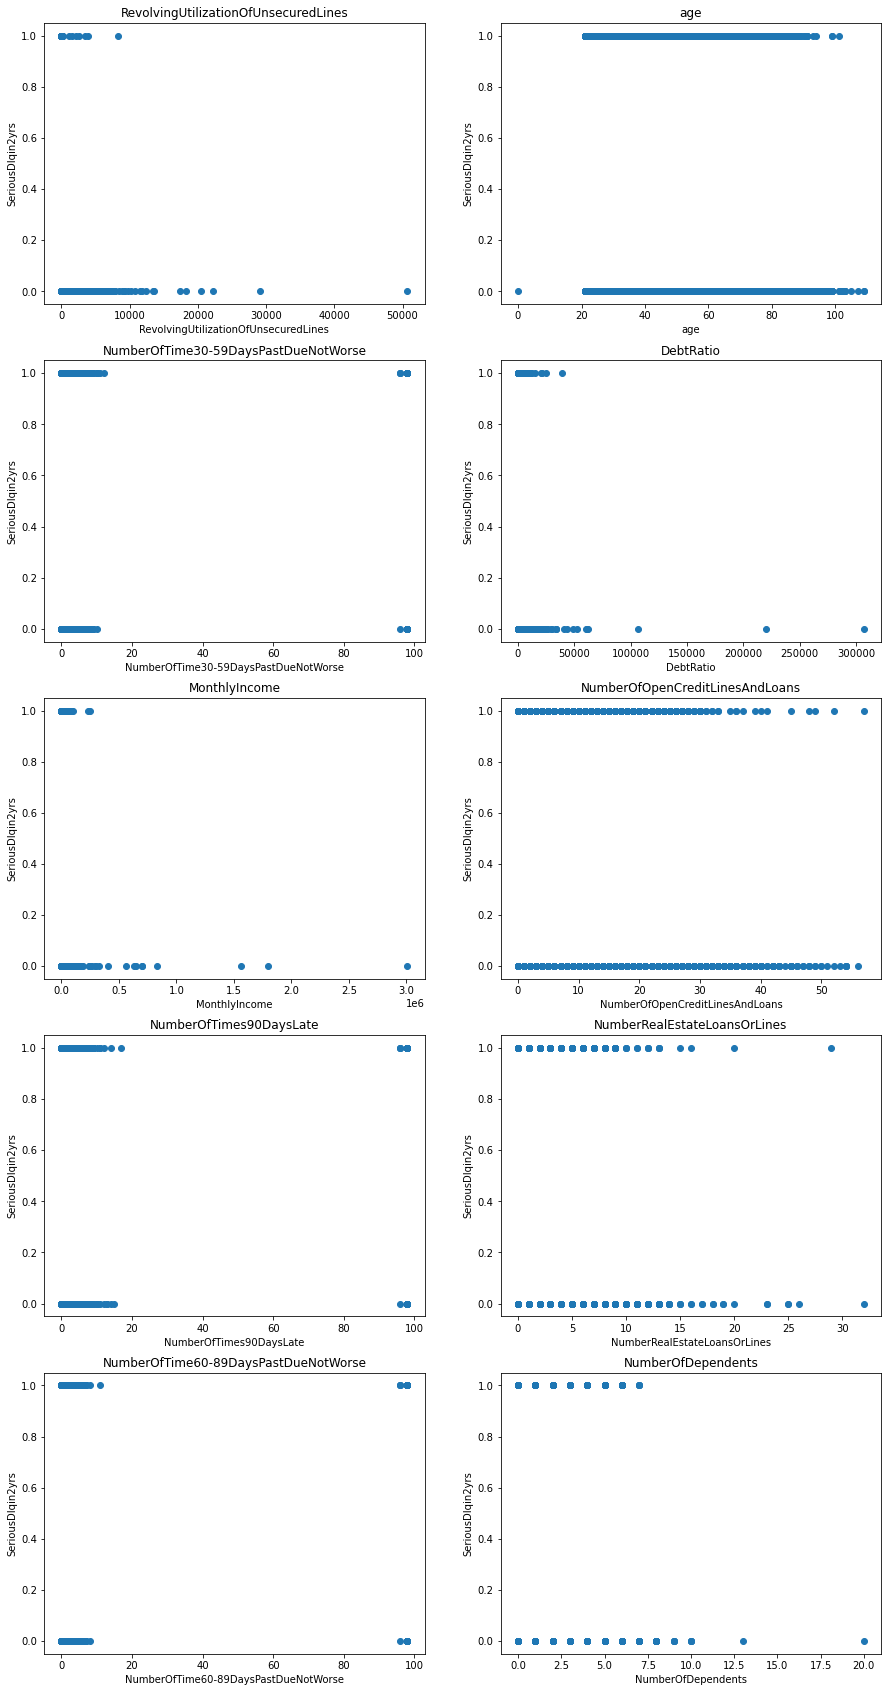

In [10]:
# create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,30))

# nested for loops to iterate over all the features and plot the same
for i in range(0,5):
    for j in range(0,2):
        col= cols[i * 2 + j]
        axes[i,j].set_title(col)
        axes[i,j].scatter(X_train[col],y_train)
        axes[i,j].set_xlabel(col)
        axes[i,j].set_ylabel('SeriousDlqin2yrs')

In [11]:
# Check for null values
print(X_train.isnull().sum())

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20727
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2722
dtype: int64


In [12]:
# Filling the missing values for columns in training data set
X_train['MonthlyIncome'].fillna(X_train['MonthlyIncome'].median(),inplace = True)
X_train['NumberOfDependents'].fillna(X_train['NumberOfDependents'].median(),inplace = True)

In [13]:
# Filling the missing values for columns in testing data set
X_test['MonthlyIncome'].fillna(X_test['MonthlyIncome'].median(),inplace = True)
X_test['NumberOfDependents'].fillna(X_test['NumberOfDependents'].median(),inplace = True)

In [14]:
# Checking for null values

print(X_test.isnull().sum())

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


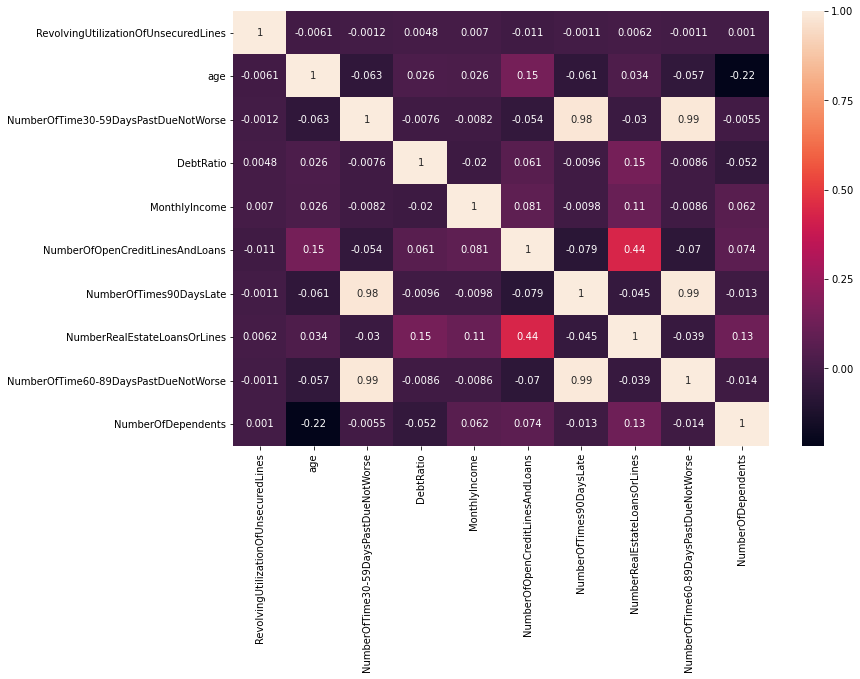

In [16]:
# Correlation matrix for training set
X_train.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize = (12,8))
sns.heatmap(X_train.corr(), annot = True)

In [17]:
# drop the columns which are correlated amongst each other except one
X_train.drop(columns = ['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'],axis=1,inplace=True)
X_test.drop(columns = ['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'],axis=1,inplace=True)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Instantiate the model in a variable in log_reg
log_reg = LogisticRegression() 

In [20]:
# Fit the model on training data
log_reg.fit(X_train,y_train)

# Predictions of the training dataset
y_pred = log_reg.predict(X_test)

In [21]:
# accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9351111111111111


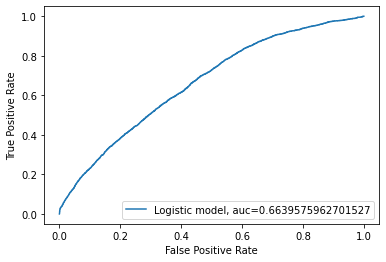

In [22]:
# Plot the auc-roc curve

score = roc_auc_score(y_pred , y_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [23]:
# Evaluation parameters for the model

f1 = f1_score(y_test, log_reg.predict(X_test))
precision = precision_score(y_test, log_reg.predict(X_test))
recall = recall_score(y_test, log_reg.predict(X_test))
roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print ('Confusion_matrix' + '\n', confusion_matrix(y_test, log_reg.predict(X_test)))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

Confusion_matrix
 [[42031    39]
 [ 2881    49]]
Classification_report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     42070
           1       0.56      0.02      0.03      2930

    accuracy                           0.94     45000
   macro avg       0.75      0.51      0.50     45000
weighted avg       0.91      0.94      0.91     45000



In [24]:
# Check value counts of target variable for data imbalance
count = y.value_counts()

In [25]:
# Instantiate smote
smote = SMOTE(random_state=9)

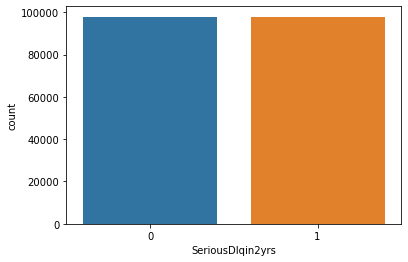

In [26]:
# Fit Smote on training set
X_sample, y_sample = smote.fit_sample(X_train, y_train)

# Check for count of class
sns.countplot(y_sample)

In [27]:
# Fit logistic regresion model on X_sample and y_sample
log_reg.fit(X_sample,y_sample)

LogisticRegression()

In [28]:
# Store the result predicted in y_pred
y_pred = log_reg.predict(X_test)

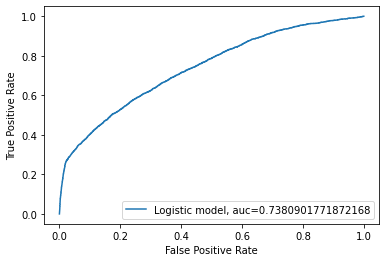

In [29]:
# Store the auc_roc score

score = roc_auc_score(y_pred , y_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [30]:
# Evaluation parameters for the model

f1 = f1_score(y_test, log_reg.predict(X_test))
precision = precision_score(y_test, log_reg.predict(X_test))
recall = recall_score(y_test, log_reg.predict(X_test))
roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print ('Confusion_matrix' + '\n', confusion_matrix(y_test, log_reg.predict(X_test)))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

Confusion_matrix
 [[28641 13429]
 [ 1045  1885]]
Classification_report
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     42070
           1       0.12      0.64      0.21      2930

    accuracy                           0.68     45000
   macro avg       0.54      0.66      0.50     45000
weighted avg       0.91      0.68      0.76     45000



In [31]:
# Instantiate RandomForrestClassifier to a variable rf.
rf = RandomForestClassifier(random_state =9)

In [32]:
# Fit the model on training data.
rf.fit(X_sample,y_sample)

RandomForestClassifier(random_state=9)

In [33]:
# store the predicted values of testing data in variable y_pred.
y_pred = rf.predict(X_test)

In [34]:
# Store the different evaluation values.
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print ('Confusion_matrix' + '\n', confusion_matrix(y_test, y_pred))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

Confusion_matrix
 [[38712  3358]
 [ 1707  1223]]
Classification_report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     42070
           1       0.27      0.42      0.33      2930

    accuracy                           0.89     45000
   macro avg       0.61      0.67      0.63     45000
weighted avg       0.91      0.89      0.90     45000



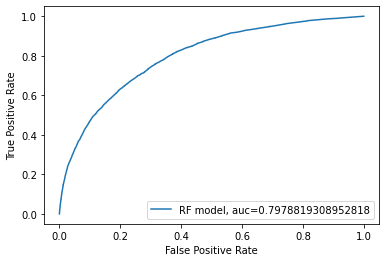

In [35]:
# Plot the auc_roc graph
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="RF model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()